# Run Stable Diffusion to Generate AI Drawings Using KerasCV

In [ ]:
# prompt for the image(s); the second line is borrowed from NightCafe Creator
prompt = "Star Wars, " + \
  "Studio Ghibli, Anime Key Visual, by Makoto Shinkai, Deep Color, Intricate, 8k resolution concept art, Natural Lighting, Beautiful Composition"

# image size has to be multiples of 128; 512 is recommended.
img_size = 512

# actual rendered image size (inches); does not effect the model
ax_size = 8

# how many images to be generated
img_num = 5

# iterations of images  (= image quality)
img_steps = 25

In [ ]:
# Do not use GPU runtime in Colab. Stable Diffusion seems to require 10 GB+ GPU memory.
# The following lines turn off CUDA on your machine, required if you don't have enough resources.

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 

In [ ]:
%pip install --upgrade tensorflow keras-cv tensorflow_datasets pycocotools IProgress

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.9/634.9 KB 7.7 MB/s eta 0:00:00


In [ ]:
import keras_cv

model = keras_cv.models.StableDiffusion(img_width=img_size, img_height=img_size, jit_compile=True)

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [ ]:
images = model.text_to_image(prompt, batch_size=img_num, num_steps=img_steps)

492466864/492466864 [==============================] - 9s 0us/step


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


198180272/198180272 [==============================] - 3s 0us/step


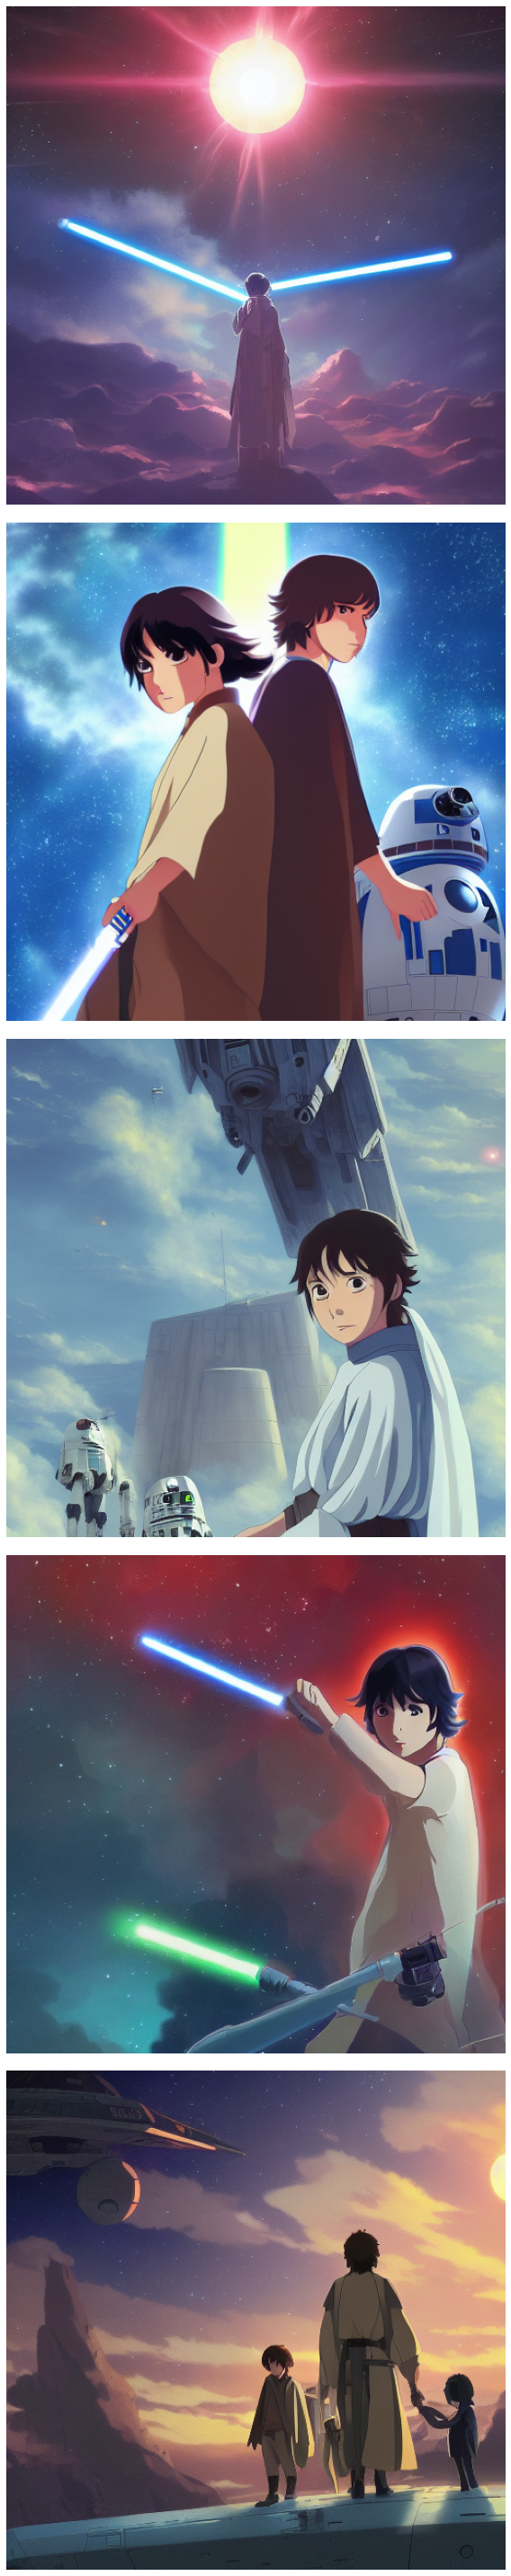

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(ax_size, ax_size * img_num))

for i, img in enumerate(images):
  ax = fig.add_subplot(img_num, 1, i + 1)
  ax.set_axis_off()
  plt.imsave(f'./img-{i+1:02d}.jpg', img)
  plt.imshow(img)

plt.tight_layout()
plt.show()